In [1]:
from TM1py.Services import TM1Service
from TM1py.Utils import Utils
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import matplotlib.pyplot as plt
import re

In [ ]:
def transfer_data(tm1_src: TM1Service,cube_src:str,vSecenario:str,vVersion:str,vOrderYear:str,vMonthDay:str,vCOACompany:str,vCurrency:str,vCountry:str,
            vRegionState:str,vRegionCity:str,vPlatfrom:str,vBehavior:str,vProduct:str,vDataSource:str):
    mdx='''
        SELECT 
          NON EMPTY 
           {[ZL Amazon Management Report Item].[净销售数量]}
          NON EMPTY 
           {Descendants([Product].[001])}
           PROPERTIES [Product].[Product].[Code and Desc]  ON ROWS 
        FROM [ZL Amazon Payments Data Report] 
        WHERE 
          (
           [Scenario].[Scenario].[ACT],
           [Version].[Version].[WIP],
           [COA Company].[COA Company].[002],
           [Country].[Country].[US],
           [Currency].[Currency].[CNY],
           [Platform].[Platform].[All Platforms],
           [SA Month].[SA Month].[M01],
           [Data Source Payments Data Report].[Data Source Payments Data Report].[Base],
           [M ZL Amazon Payments Data Report].[M ZL Amazon Payments Data Report].[Amount],
           [SA Year].[SA Year].[2021]
          )
         '''
    #元组字典
    cells=tm1_src.cubes.cells.execute_mdx(mdx,skip_rule_derived_cells=True,skip_zeros=True)
    df = Utils.build_pandas_dataframe_from_cellset(cells)
    df.reset_index(inplace=True)
    df_filter=df[(df['SA Year']!='Year Rollup')& (df['SA Year']!='All Years')&(df['SA Month'].apply(lambda x:re.match('^M..$',x,re.IGNORECASE)))]
    df_pivot=df_filter.pivot(index=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
                              ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG'],columns='M ZL Amazon Payments Data STG'
                      ,values='Values').reset_index().reset_index(drop=True)
    
    
    return df_pivot

In [2]:
tm1_src = TM1Service(address="localhost", port=30059, ssl=False, user="admin", password="")

In [23]:
mdx='''
    SELECT 
     NON EMPTY 
        {[ZL Amazon Management Report Item].[净销售数量]} ON COLUMNS, 
     NON EMPTY 
        Tm1filterbylevel({Descendants([Product].[001])},0)
        PROPERTIES [Product].[Product].[Code and Desc]  ON ROWS 
    FROM [ZL Amazon Payments Data Report] 
    WHERE 
        (
        [Scenario].[Scenario].[ACT],
        [Version].[Version].[WIP],
        [COA Company].[COA Company].[002],
        [Country].[Country].[US],
        [Currency].[Currency].[CNY],
        [Platform].[Platform].[All Platforms],
        [SA Month].[SA Month].[M01],
        [Data Source Payments Data Report].[Data Source Payments Data Report].[Base],
        [M ZL Amazon Payments Data Report].[M ZL Amazon Payments Data Report].[Amount],
        [SA Year].[SA Year].[2021]
        )
         '''
    #元组字典
df = tm1_src.cells.execute_mdx_dataframe(mdx=mdx,skip_consolidated_cells=False,skip_rule_derived_cells=True,skip_zeros=True,include_attributes=True)
#     df.reset_index(inplace=True)
#     df_filter=df[(df['SA Year']!='Year Rollup')& (df['SA Year']!='All Years')&(df['SA Month'].apply(lambda x:re.match('^M..$',x,re.IGNORECASE)))]
#     df_pivot=df_filter.pivot(index=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
#                               ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG'],columns='M ZL Amazon Payments Data STG'
#                       ,values='Values').reset_index().reset_index(drop=True)

In [26]:
df2=df.drop(columns=['Caption','中文','Code and Desc.1','英文'])

In [27]:
df2

,Product,Code and Desc,ZL Amazon Management Report Item,Value
0,LSKU1571,LSKU1571 - Abbey-280g工字杯jasmine植物蜡单个,净销售数量,1638.0
1,LSKU1898,LSKU1898 - Oval-350g绿色玻璃杯香脂雪松味植物蜡单个,净销售数量,653.0
2,LSKU1897,LSKU1897 - Oval-350g蓝色玻璃罐桉木和无花果味植物蜡单个,净销售数量,1186.0
3,LSKU1189,LSKU1189 - Oval-浓琥珀味玻璃杯蜡烛350克,净销售数量,1001.0
4,LSKU1899,LSKU1899 - Oval-350g内喷白玻璃罐香草味植物蜡单个,净销售数量,1166.0
5,LSKU1323,LSKU1323 - Gift Set-60g黑色玻璃杯植物蜡四季礼盒套四,净销售数量,-1.0
6,LSKU1572,LSKU1572 - Citronella-415g蓝色铁罐citronella植物蜡套三,净销售数量,1.0
7,LSKU1175,LSKU1175 - Mar-香茅草铁罐蜡烛330克,净销售数量,7.0
8,LSKU1833,LSKU1833 - Amber-550g粉色玻璃罐玫瑰香型植物蜡单个,净销售数量,1451.0
9,LSKU1250,LSKU1250 - Luxe-百合甜豌豆味玻璃杯蜡烛240克,净销售数量,255.0


In [28]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [43]:
def str_concat(a,b):
    return str(a)*int(b)
product_strings=df2.apply(lambda x:str_concat(x['Code and Desc'],x['Value']),axis=1)

In [45]:
context=''
for sentence in product_strings:
    context+=sentence

In [47]:
#切割文本至词汇 以列表形式
words=jieba.lcut(context)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built successfully.


In [48]:
#用空格将词汇列表拼接
words=' '.join(words)

In [49]:
wc=WordCloud.generate(WordCloud(font_path=r'C:/Windows/Fonts/simhei.ttf'),text=words)

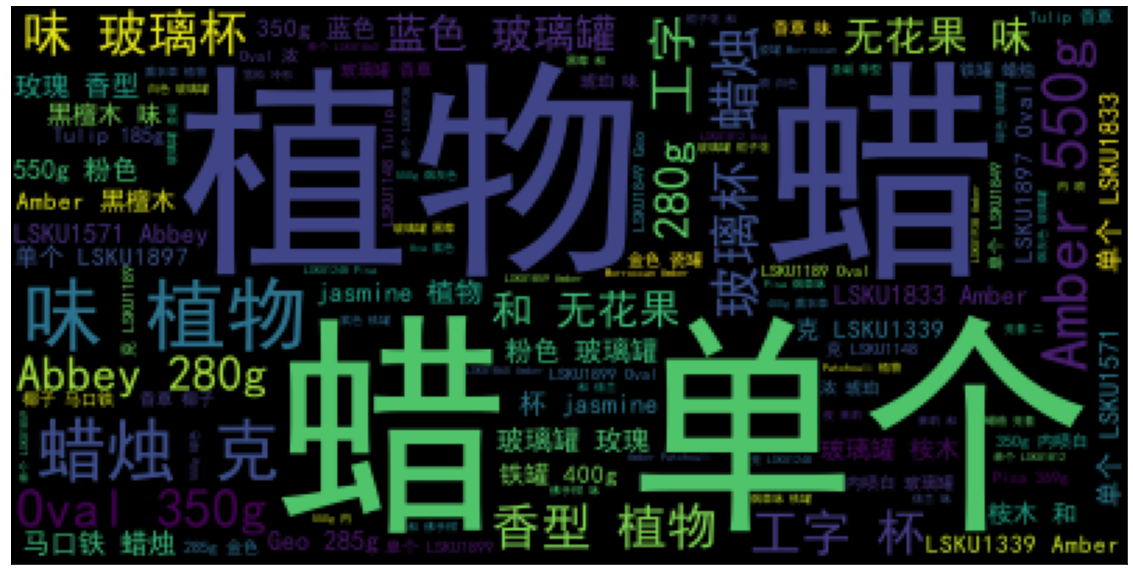

In [50]:
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
plt.savefig(r'C:\Users\User\Desktop\词云2.jpg',dpi=300)
plt.show()